Section 1: Credit Card approval Project is used to whether the person is eligible for loan or not . If bank sector determines the right person he can repay the loan correctly. This Project aims to predict based on the given conditions whether the person is eligible for loan or not .

Importing two data sets credit_card.csv and credit card_label.csv

In [75]:
import pandas as pd
df=pd.read_csv('/content/Credit_card.csv')
df1=pd.read_csv('/content/Credit_card_label.csv')
df.head(5)
df1.head(5)
print(df)
print(df1.columns)


       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

Merging Two data frames based on the column IND_ID

In [76]:
new_df = pd.merge(df, df1, on='Ind_ID')
print(new_df)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

Section 3 - Feature Engineering techniques

Using **Feature Engineering Techniques** we can remove null values , replacing the null values and convert categorical values to numerical values

To get the information of new_df dataframe

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

converting categorical values in Type_Occupation column to numerical values

In [78]:
new_df['Type_Occupation'].unique()
t_o={}
t_type=['Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents']
for i in range(0,len(t_type)):
  t_o[t_type[i]]=i+1
print(t_o)
new_df['Type_Occupation']=new_df['Type_Occupation'].map(t_o)
print(new_df['Type_Occupation'])

{'Core staff': 1, 'Cooking staff': 2, 'Laborers': 3, 'Sales staff': 4, 'Accountants': 5, 'High skill tech staff': 6, 'Managers': 7, 'Cleaning staff': 8, 'Drivers': 9, 'Low-skill Laborers': 10, 'IT staff': 11, 'Waiters/barmen staff': 12, 'Security staff': 13, 'Medicine staff': 14, 'Private service staff': 15, 'HR staff': 16, 'Secretaries': 17, 'Realty agents': 18}
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1543    7.0
1544    5.0
1545    7.0
1546    9.0
1547    NaN
Name: Type_Occupation, Length: 1548, dtype: float64


converting categorical values in 'Housing_type' column to numerical values

In [79]:
df['Housing_type'].unique()
h_t={}
h_type=['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment']
for i in range(0,len(h_type)):
  h_t[h_type[i]]=i+1
print(h_t)
new_df['Housing_type']=new_df['Housing_type'].map(h_t)
print(new_df['Housing_type'])

{'House / apartment': 1, 'With parents': 2, 'Rented apartment': 3, 'Municipal apartment': 4, 'Co-op apartment': 5, 'Office apartment': 6}
0       1
1       1
2       1
3       1
4       1
       ..
1543    1
1544    1
1545    1
1546    1
1547    1
Name: Housing_type, Length: 1548, dtype: int64


Converting categorical values in 'Marital_status' column to numerical values

In [80]:
df['Marital_status'].unique()
mart={}
martital=['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow']
for i in range(0,len(martital)):
  mart[martital[i]]=i+1
# mart
print(mart)
new_df['Marital_status']=new_df['Marital_status'].map(mart)
print(new_df['Marital_status'])

{'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Separated': 4, 'Widow': 5}
0       1
1       1
2       1
3       1
4       1
       ..
1543    1
1544    2
1545    1
1546    3
1547    1
Name: Marital_status, Length: 1548, dtype: int64


Converting categorical values in 'Education' column to numerical values

In [81]:

edu={'Secondary / secondary special': 1, 'Academic degree': 2, 'Lower secondary': 3, 'Higher education': 4
     , 'Incomplete higher': 5}
new_df['EDUCATION'].unique()
new_df['EDUCATION']=new_df['EDUCATION'].map(edu)
print(new_df['EDUCATION'])

0       4
1       4
2       4
3       4
4       4
       ..
1543    4
1544    5
1545    4
1546    1
1547    4
Name: EDUCATION, Length: 1548, dtype: int64


Converting categorical values in 'Type_income' column to numerical values

In [82]:
new_df['Type_Income'].unique()
type_income={'Pensioner':1,'Commercial associate':2,'Working':3,'State servant':4}
new_df['Type_Income']=new_df['Type_Income'].map(type_income)

Converting categorical values in 'Propert_Owner' column to numerical values

In [83]:
new_df['Propert_Owner'].unique()
property_owner={'Y':1,'N':0}
new_df['Propert_Owner']=new_df['Propert_Owner'].map(property_owner)
new_df['Propert_Owner']

0       1
1       0
2       0
3       0
4       0
       ..
1543    1
1544    0
1545    1
1546    0
1547    1
Name: Propert_Owner, Length: 1548, dtype: int64

Converting categorical values in 'Car_owner' column to numerical values

In [84]:

car_owner={'Y':1,'N':0}
new_df['Car_Owner']=new_df['Car_Owner'].map(car_owner)
new_df['Car_Owner']

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    1
1546    1
1547    1
Name: Car_Owner, Length: 1548, dtype: int64

In [90]:
new_df['GENDER'].unique()
gender={'M':1,'F':2}
new_df['GENDER']=new_df['GENDER'].map(gender)
new_df['GENDER'].value_counts()

2.0    973
1.0    568
Name: GENDER, dtype: int64

To check how many null values are present in new_df data frame

In [86]:
new_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Describe function shows the count, min , max etc., values of each column in dataframe

In [87]:
new_df.describe()

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1.525000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060.000000,1548.000000,1548.000000
mean,5.078920e+06,0.403101,0.652455,0.412791,1.913993e+05,2.491602,2.029716,1.656977,1.223514,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,5.385849,2.161499,0.113049
std,4.171759e+04,0.490679,0.476345,0.776691,1.132530e+05,0.864771,1.475206,1.144633,0.749343,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,3.896827,0.947772,0.316755
min,5.008827e+06,0.000000,0.000000,0.000000,3.375000e+04,1.000000,1.000000,1.000000,1.000000,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,0.000000,0.000000,1.215000e+05,2.000000,1.000000,1.000000,1.000000,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.000000,0.000000,1.665000e+05,3.000000,1.000000,1.000000,1.000000,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,7.000000,3.000000,0.000000
max,5.150412e+06,1.000000,1.000000,14.000000,1.575000e+06,4.000000,5.000000,5.000000,6.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,18.000000,15.000000,1.000000


Filling the null value with female value in gender column

In [91]:
new_df['GENDER']=new_df['GENDER'].fillna(2.0)
new_df['GENDER'].unique()

array([1., 2.])

In [93]:
new_df['GENDER']=new_df['GENDER'].astype(int)
new_df['GENDER']

0       1
1       2
2       2
3       2
4       2
       ..
1543    2
1544    2
1545    1
1546    1
1547    2
Name: GENDER, Length: 1548, dtype: int64

In [94]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   int64  
 2   Car_Owner        1548 non-null   int64  
 3   Propert_Owner    1548 non-null   int64  
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   int64  
 7   EDUCATION        1548 non-null   int64  
 8   Marital_status   1548 non-null   int64  
 9   Housing_type     1548 non-null   int64  
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   float64
 17  Family_Members

In [95]:
new_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,4,1,1,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,2,1,0,0,315000.0,2,4,1,1,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,2,1,0,0,315000.0,2,4,1,1,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,2,1,0,0,NaN,2,4,1,1,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,2,1,0,0,315000.0,2,4,1,1,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,2,0,1,0,NaN,2,4,1,1,-11957.0,-2182,1,0,0,0,7.0,2,0
1544,5023655,2,0,0,0,225000.0,2,5,2,1,-10229.0,-1209,1,0,0,0,5.0,1,0
1545,5115992,1,1,1,2,180000.0,3,4,1,1,-13174.0,-2477,1,0,0,0,7.0,4,0
1546,5118219,1,1,0,0,270000.0,3,1,3,1,-15292.0,-645,1,1,1,0,9.0,2,0


In [96]:
new_df.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Replacing null values of Annual income value with average value

In [97]:
new_df['Annual_income']=new_df['Annual_income'].fillna(new_df['Annual_income'].mean())

Replacing null values of Birthday_count value with max value

In [98]:
new_df['Birthday_count']=new_df['Birthday_count'].fillna(max(new_df['Birthday_count']))

Replacing null values of Type_occupation value with max value

In [99]:
new_df['Type_Occupation']=new_df['Type_Occupation'].fillna(3.0)

In [100]:
new_df['Type_Occupation']=new_df['Type_Occupation'].astype('int')

Now checking the information of new_df whether null values are present after replacing with new values

In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   int64  
 2   Car_Owner        1548 non-null   int64  
 3   Propert_Owner    1548 non-null   int64  
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   int64  
 7   EDUCATION        1548 non-null   int64  
 8   Marital_status   1548 non-null   int64  
 9   Housing_type     1548 non-null   int64  
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   int64  
 17  Family_Members

In [102]:
new_df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

visualizing barplot using seaborn module
Here 'Type_Occupation' column is labelled against 'label' column based on gender. Credit card approval percentage is more for female than male
with respect to Occupation type .

<Axes: xlabel='Type_Occupation', ylabel='label'>

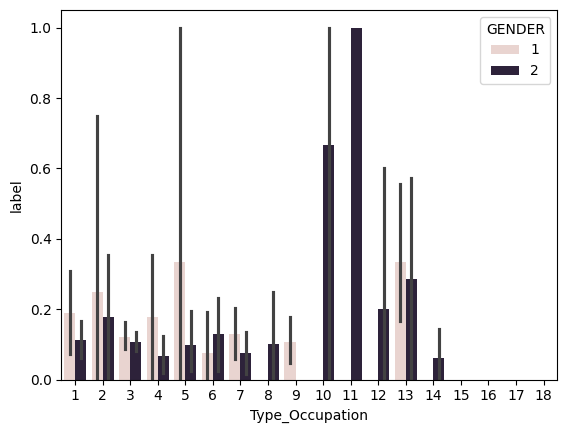

In [104]:
import seaborn as sns
## Visualization of Purchase with occupation
sns.barplot(x='Type_Occupation',y='label',hue='GENDER',data=new_df)

visualizing barplot using seaborn module
Here 'Car_Owner' column is labelled against 'label' column based on gender.Credit card approval percentage is more for female than male
with respect to Car_owner column .

<Axes: xlabel='Car_Owner', ylabel='label'>

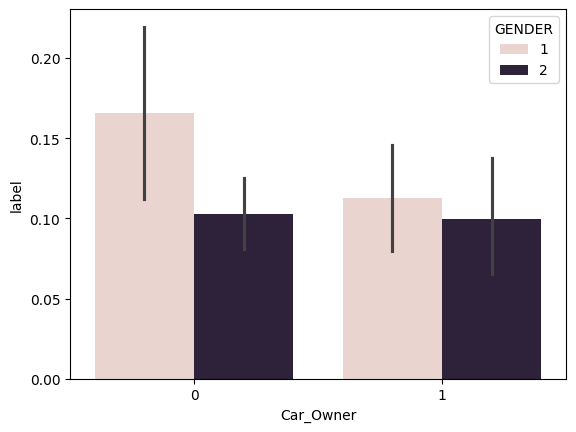

In [105]:
import seaborn as sns
## Visualization of Purchase with occupation
sns.barplot(x='Car_Owner',y='label',hue='GENDER',data=new_df)

visualizing barplot using seaborn module
Here 'Housing type' column is labelled against 'label' column based on gender. Credit card approval percentage is more for female than male
with respect to Housing type variable .

<Axes: xlabel='Housing_type', ylabel='label'>

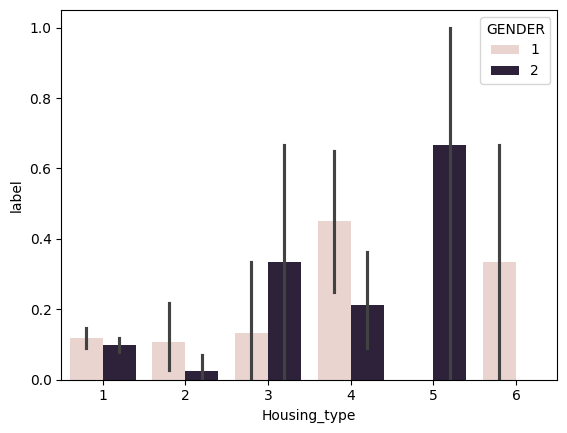

In [106]:
sns.barplot(x='Housing_type',y='label',hue='GENDER',data=new_df)

From the given Distibution we can conclude that Annual income is rightly skewed

<Axes: title={'center': 'Distribution of housing_median_age'}, xlabel='Annual_income', ylabel='Count'>

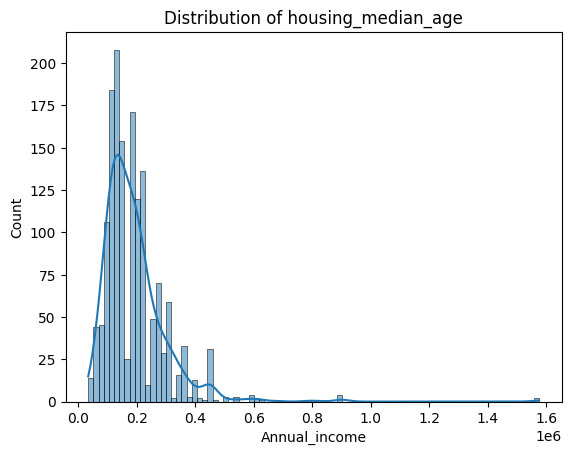

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.title("Distribution of Annual income")
sns.histplot(new_df['Annual_income'],kde=True)

From the given Distibution we can conclude that Type of occupation is rightly skewed

<Axes: xlabel='Type_Occupation', ylabel='Count'>

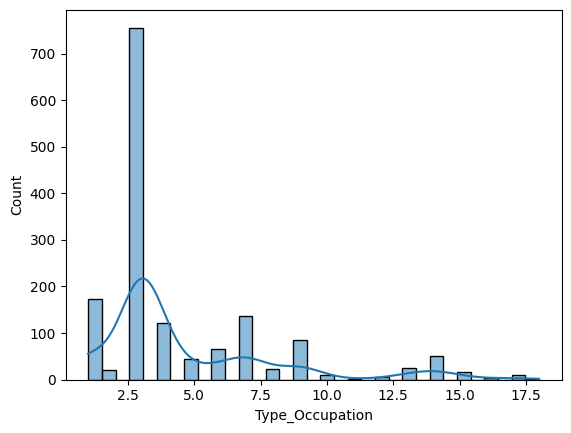

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
sns.histplot(new_df['Type_Occupation'],kde=True)

Correlation matrix to find how two two variables are correlated

<Axes: >

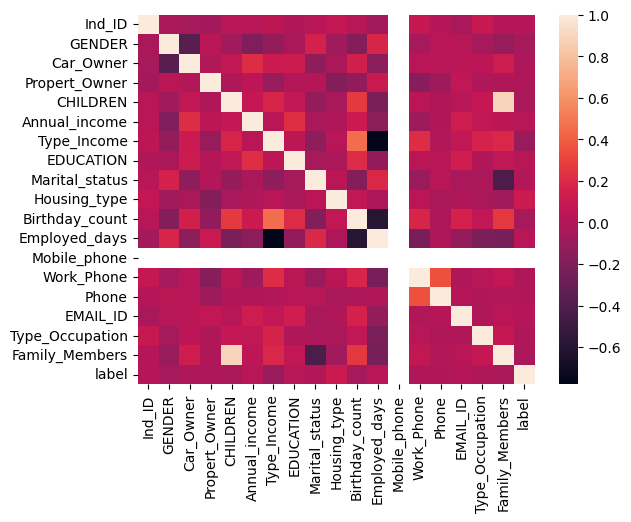

In [110]:
import seaborn as sns
sns.heatmap(new_df.corr())

Section 2 - Feature Selection Techniques

Using chi quare test to find out whether Mobile_phone column has any relation with output variable label. Here P values is taken as 0.05
( Determined my domain expert). Usually if the P value lies within 97% of normal distribtion is accepted . So i have taken p value as 0.05.
From the calculation it clearly shows Mobile phone variable had no relation with output variable label

In [111]:
import scipy.stats as stats
from scipy.stats import chi2
dataset_table=pd.crosstab(df['Mobile_phone'],df1['label'])
print(dataset_table)
print(dataset_table.values)
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)
val=stats.chi2_contingency(dataset_table)
print(val)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

label            0    1
Mobile_phone           
1             1373  175
[[1373  175]]
Observed Values :-
 [[1373  175]]
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[1373.,  175.]]))
Degree of Freedom:- 0
chi-square statistic:- 0.0
critical_value: nan
p-value: nan
Significance level:  0.05
Degree of Freedom:  0
p-value: nan
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


Using chi quare test to find out whether EMAIL_ID column has any relation with output variable label. Here P values is taken as 0.05
( Determined my domain expert). Usually if the P value lies within 97% of normal distribtion is accepted . So i have taken p value as 0.05.
From the calculation it clearly shows Email_id column had no relation with output variable label

In [112]:
import scipy.stats as stats
from scipy.stats import chi2
dataset_table=pd.crosstab(df['EMAIL_ID'],df1['label'])
print(dataset_table)
print(dataset_table.values)
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)
val=stats.chi2_contingency(dataset_table)
print(val)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

label        0    1
EMAIL_ID           
0         1248  157
1          125   18
[[1248  157]
 [ 125   18]]
Observed Values :-
 [[1248  157]
 [ 125   18]]
Chi2ContingencyResult(statistic=0.13673828251771455, pvalue=0.7115453763877984, dof=1, expected_freq=array([[1246.16602067,  158.83397933],
       [ 126.83397933,   16.16602067]]))
Degree of Freedom:- 1
chi-square statistic:- 0.2584525335244881
critical_value: 3.841458820694124
p-value: 0.6111852835828315
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.6111852835828315
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


Using chi quare test to find out whether Work_phone column has any relation with output variable label. Here P values is taken as 0.05
( Determined my domain expert). Usually if the P value lies within 97% of normal distribtion is accepted . So i have taken p value as 0.05.
From the calculation it clearly shows work phone variable had no relation with output variable label

In [113]:
import scipy.stats as stats
from scipy.stats import chi2
dataset_table=pd.crosstab(df['Work_Phone'],df1['label'])
print(dataset_table)
print(dataset_table.values)
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)
val=stats.chi2_contingency(dataset_table)
print(val)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

label          0    1
Work_Phone           
0           1086  140
1            287   35
[[1086  140]
 [ 287   35]]
Observed Values :-
 [[1086  140]
 [ 287   35]]
Chi2ContingencyResult(statistic=0.03180437497153464, pvalue=0.8584576855494042, dof=1, expected_freq=array([[1087.40180879,  138.59819121],
       [ 285.59819121,   36.40180879]]))
Degree of Freedom:- 1
chi-square statistic:- 0.07684851792239968
critical_value: 3.841458820694124
p-value: 0.7816145215831092
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.7816145215831092
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


Using chi quare test to find out whether phone column has any relation with output variable label. Here P values is taken as 0.05
( Determined my domain expert). Usually if the P value lies within 97% of normal distribtion is accepted . So i have taken p value as 0.05.
From the calculation it clearly shows phone column had no relation with output variable label

In [114]:
import scipy.stats as stats
from scipy.stats import chi2
dataset_table=pd.crosstab(df['Phone'],df1['label'])
print(dataset_table)
print(dataset_table.values)
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)
val=stats.chi2_contingency(dataset_table)
print(val)
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
# p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

label    0    1
Phone          
0      948  121
1      425   54
[[948 121]
 [425  54]]
Observed Values :-
 [[948 121]
 [425  54]]
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[948.1505168, 120.8494832],
       [424.8494832,  54.1505168]]))
Degree of Freedom:- 1
chi-square statistic:- 0.0006830633659059245
critical_value: 3.841458820694124
p-value: 0.9791492769937159
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.9791492769937159
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


SelectKbest and f_regression are the feature selection techniques which is provided by sklearn to determine how strongly each column is related with output variable. More the value higher the relationship between two varibles.

**Feature Selection Technique**

In [115]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# data = pd.read_csv("train.csv")
X = new_df.iloc[:,0:18]  #independent columns
y = new_df.iloc[:,-1]


In [116]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

In [117]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [118]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [119]:
featureScores

,Specs,Score
0,Ind_ID,0.436279
1,GENDER,3.230472
2,Car_Owner,0.335686
3,Propert_Owner,0.495844
4,CHILDREN,0.724721
5,Annual_income,1.117399
6,Type_Income,13.227711
7,EDUCATION,0.835441
8,Marital_status,0.020232
9,Housing_type,18.458398


Shows top 14 features

In [120]:
print(featureScores.nlargest(14,'Score'))

              Specs      Score
9      Housing_type  18.458398
6       Type_Income  13.227711
1            GENDER   3.230472
10   Birthday_count   3.216082
11    Employed_days   1.526605
17   Family_Members   1.459357
5     Annual_income   1.117399
7         EDUCATION   0.835441
4          CHILDREN   0.724721
3     Propert_Owner   0.495844
0            Ind_ID   0.436279
2         Car_Owner   0.335686
16  Type_Occupation   0.290535
15         EMAIL_ID   0.258162


Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [121]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [122]:
#shows top 14 features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(14))

Ind_ID             0.171488
Annual_income      0.116249
Birthday_count     0.112813
Employed_days      0.086908
Type_Occupation    0.068204
Family_Members     0.051580
Marital_status     0.049869
Type_Income        0.046374
EDUCATION          0.041275
Car_Owner          0.039074
Housing_type       0.038818
Propert_Owner      0.033818
CHILDREN           0.032330
Work_Phone         0.031706
dtype: float64


In [123]:
print(featureScores.nlargest(14,'Score'))

              Specs      Score
9      Housing_type  18.458398
6       Type_Income  13.227711
1            GENDER   3.230472
10   Birthday_count   3.216082
11    Employed_days   1.526605
17   Family_Members   1.459357
5     Annual_income   1.117399
7         EDUCATION   0.835441
4          CHILDREN   0.724721
3     Propert_Owner   0.495844
0            Ind_ID   0.436279
2         Car_Owner   0.335686
16  Type_Occupation   0.290535
15         EMAIL_ID   0.258162


Using Extratree classifer, chi quare test and slectkbest feature selection techniques we came to conclusion that totally 11 varibles are important ie('Housing_type','Type_Income','Birthday_count','Employed_days','Family_Members','Annual_income','EDUCATION','CHILDREN','Propert_Owner','Car_Owner','Type_Occupation')

In [124]:
f_dataframe=new_df[['Housing_type','Type_Income','Birthday_count','Employed_days','Family_Members','Annual_income','EDUCATION','CHILDREN','Propert_Owner','Car_Owner','Type_Occupation']]

In [126]:
X=f_dataframe.iloc[:,0:11]
y=new_df['label']

Section 4 - Machine Learning Model

Machine Learning Model
Here Iam using Logistic Regression , SVC classifier , Naive bayes , Decisiontree classifier for classification

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
#SVC classifier
clf1=SVC(random_state=101)
clf1=clf1.fit(X_train,y_train)
#Decisiontree classifier
clf2=DecisionTreeClassifier()
clf2=clf2.fit(X_train,y_train)
#Naive bayes
clf3=GaussianNB()
clf3=clf3.fit(X_train,y_train)
# Prediction for logistic regression
y_pred = clf.predict(X_test)
#Prediction for SVC classifier
y_pred1=clf1.predict(X_test)
#Prediction for Decisiontree classifier
y_pred2=clf2.predict(X_test)
#Prediction for Naive bayes
y_pred3=clf3.predict(X_test)

acc = accuracy_score(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)
print("Logistic Regression model Confusion Matrix")
print(conf)
acc = accuracy_score(y_test, y_pred1)
conf=confusion_matrix(y_test, y_pred1)
print("SVC model accuracy (in %):", acc*100)
print("SVC model Confusion Matrix")
print(conf)
acc = accuracy_score(y_test, y_pred2)
conf=confusion_matrix(y_test, y_pred2)
print("DecisionTree accuracy (in %):", acc*100)
print("Decision model Confusion Matrix")
print(conf)
acc = accuracy_score(y_test, y_pred3)
conf=confusion_matrix(y_test, y_pred3)
print("Naive bayes classifier accuracy (in %):", acc*100)
print("Naive model Confusion Matrix (in %)")
print(conf)

Logistic Regression model accuracy (in %): 88.06451612903226
Logistic Regression model Confusion Matrix
[[273   0]
 [ 37   0]]
SVC model accuracy (in %): 88.06451612903226
SVC model Confusion Matrix
[[273   0]
 [ 37   0]]
DecisionTree accuracy (in %): 86.45161290322581
Decision model Confusion Matrix
[[253  20]
 [ 22  15]]
Naive bayes classifier accuracy (in %): 87.09677419354838
Naive model Confusion Matrix (in %)
[[269   4]
 [ 36   1]]


From the accuracy we dound that Logistic Regression model and SVC classifier are best models for this problem statement